## Summarize Individual Census Tracts within Designated Places
This notebook will attempt to clip or intersect census tracts inside the 3,4,5, WFH class census desinated places (CDP). The results of that overlay operation will then be assigned a weighted SVI score based on the amount of area they occupy in an individual CDP. These values will then be averaged resulting the arithmetic mean of the 4 thematic rankings and overall summary ranking for each CDP.

In [23]:
# import all the libraries
import numpy as np
import matplotlib as mp
import fiona
import shapely
import pandas as pd
import geopandas as gpd
import rasterio as rio
import rasterstats as rs
import matplotlib.pyplot as plt
from rasterio.plot import show

#change default figure size
plt.rcParams['figure.figsize'] = (12,12)

In [24]:
# read in raw census tract data from .zip and convert to geodataframe
svi = gpd.read_file(r"C:\NewMapsPlus\Map698\us-communities-fire\data\SVI2018_US.zip")

[(-140.0, -60.0), (20.0, 60.0)]

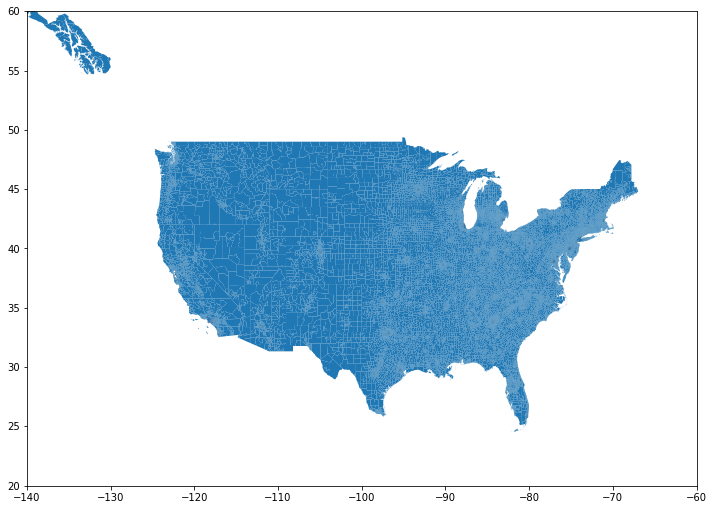

In [33]:
# have a look at the tract data in map form
ax = svi.plot(figsize=(12,12));
ax.set(xlim=(-140,-60), ylim=(20, 60)) # scale the figure with axes values

In [9]:
# get some metadata on the tracts
svi.info

<bound method DataFrame.info of        ST       STATE ST_ABBR STCNTY             COUNTY         FIPS  \
0      01     ALABAMA      AL  01015            Calhoun  01015981901   
1      01     ALABAMA      AL  01015            Calhoun  01015981902   
2      01     ALABAMA      AL  01015            Calhoun  01015981903   
3      01     ALABAMA      AL  01097             Mobile  01097003605   
4      01     ALABAMA      AL  01097             Mobile  01097990000   
...    ..         ...     ...    ...                ...          ...   
72832  51    VIRGINIA      VA  51003          Albemarle  51003010903   
72833  51    VIRGINIA      VA  51121         Montgomery  51121020202   
72834  51    VIRGINIA      VA  51700  Newport News City  51700030100   
72835  53  WASHINGTON      WA  53033               King  53033005302   
72836  53  WASHINGTON      WA  53077             Yakima  53077000100   

                                               LOCATION  AREA_SQMI  E_TOTPOP  \
0         Census Tract 

In [10]:
# get crs from data
svi.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
# read in cdps shapefile
cdps = gpd.read_file(r'C:\NewMapsPlus\Map698\us-communities-fire\notebooks\data\cdps.shp')

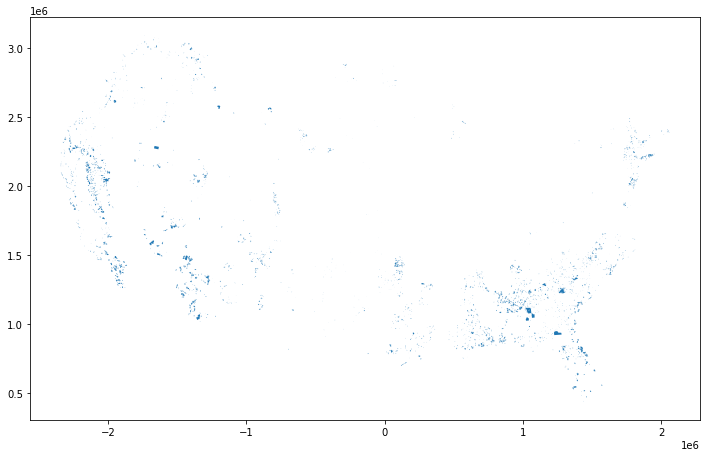

In [32]:
# look at the cdps
ax = cdps.plot()

In [20]:
# get cdp crs
cdps.crs

<Projected CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["Nor ...>
Name: NAD_1983_Albers
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Project Data Frames to same CRS for Overlay

[Text(0.5, 1.0, 'CDPS and SVI Tracts')]

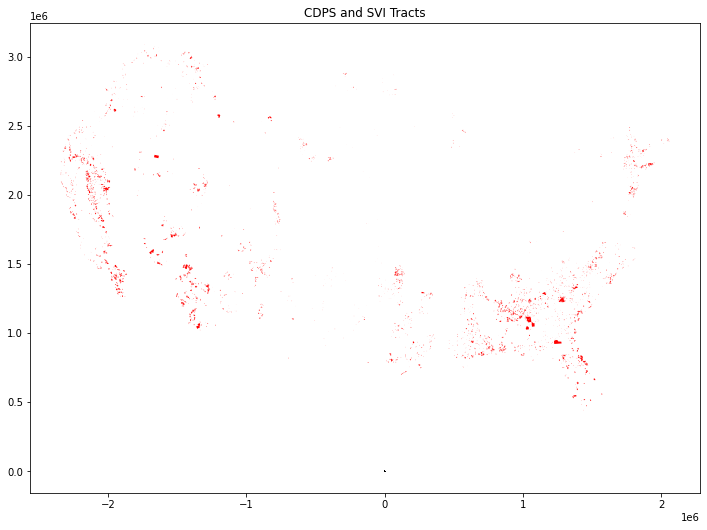

In [31]:
# overlay cdps on tracts
fig, ax = plt.subplots()

svi.plot(ax=ax, edgecolor='#000000', zorder=1);
cdps.plot(ax=ax, color='red', zorder=2);

ax.set(title='CDPS and SVI Tracts')